In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
# import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [6]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\house price 3.csv")


In [7]:
df.shape


(4600, 18)

In [8]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4599.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240705,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778481,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
df.describe(include='object')


,date,waterfront,street,city,statezip,country
count,4600,4596,4600,4600,4600,4599
unique,70,3,4525,44,77,2
top,23/06/14 0:00,0,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4561,4,1573,148,4597


In [11]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
df.tail()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09/07/14 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0.0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/14 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0.0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/14 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0.0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/14 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0.0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10/07/14 0:00,220600.0000,3,2.50,1490,8102,2.0,0,0.0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [13]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       4
view             1
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64

In [14]:
df.ndim
df.size
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4596 non-null   object 
 8   view           4599 non-null   float64
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4599 non-null   object 
dtypes: float

Shape of DataFrame: (4600, 18)
Columns in DataFrame: Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
Data Types of Columns: date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view             float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object
First 5 rows of DataFrame:
             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00 

In [30]:
# Checking a few rows of the 'date' column to better understand the date format in the dataset
data['date'].head(20)


0     02/05/14 0:00
1     02/05/14 0:00
2     02/05/14 0:00
3     02/05/14 0:00
4     02/05/14 0:00
5     02/05/14 0:00
6     02/05/14 0:00
7     02/05/14 0:00
8     02/05/14 0:00
9     02/05/14 0:00
10    02/05/14 0:00
11    02/05/14 0:00
12    02/05/14 0:00
13    02/05/14 0:00
14    02/05/14 0:00
15    02/05/14 0:00
16    02/05/14 0:00
17    02/05/14 0:00
18    02/05/14 0:00
19    02/05/14 0:00
Name: date, dtype: object

In [31]:
# Correcting the date conversion with dayfirst=True
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format='%d/%m/%y %H:%M')

# Proceed with further cleaning and analysis
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [33]:
file_path = r'C:\Users\aryan\OneDrive\Desktop\house price 3.csv'
data = pd.read_csv(file_path)

In [37]:
# Continue using dateutil to parse dates, letting errors be coerced
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Output the first few rows of the date column to check the result
data['date'].head()




0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: date, dtype: datetime64[ns]

In [38]:
missing_values = data.isnull().sum()

# 3. Remove duplicates if any
data = data.drop_duplicates()

# 4. Drop unnecessary columns for the analysis (if needed)
data_cleaned = data.drop(['street', 'city', 'statezip', 'country'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4596 non-null   object        
 8   view           4599 non-null   float64       
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 503.

D:\D\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


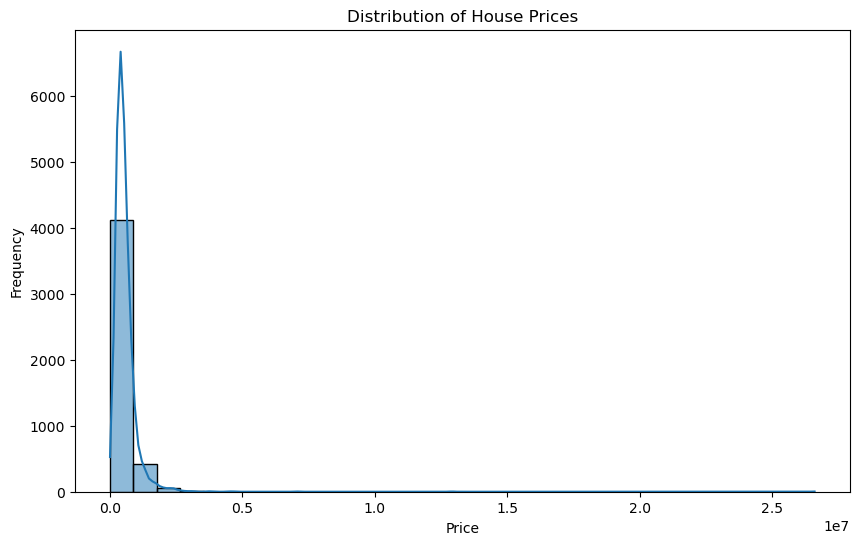

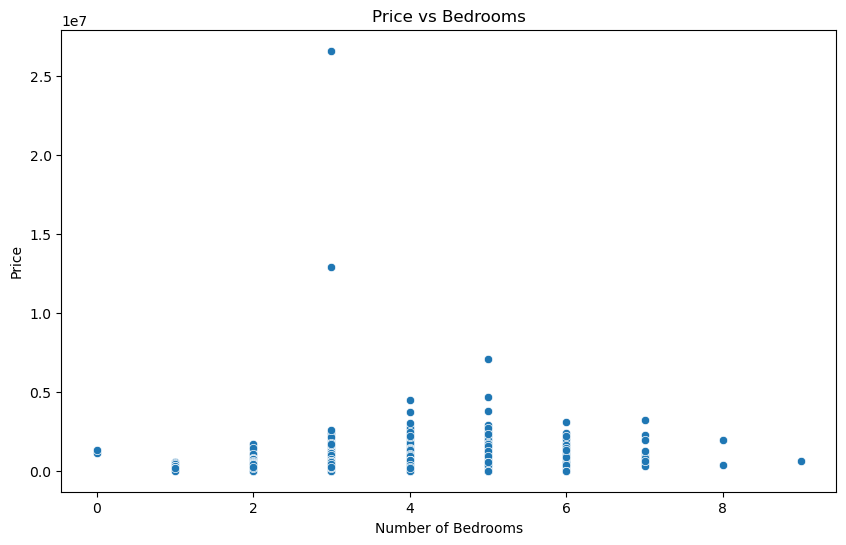

ValueError: could not convert string to float: '?'

<Figure size 1200x800 with 0 Axes>

In [39]:
data_cleaned.info()

# Univariate Analysis: Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis: Price vs Bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data_cleaned)
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Multivariate Analysis: Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Multivariate Analysis: Pairplot for price, bedrooms, bathrooms, and sqft_living
sns.pairplot(data_cleaned[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()

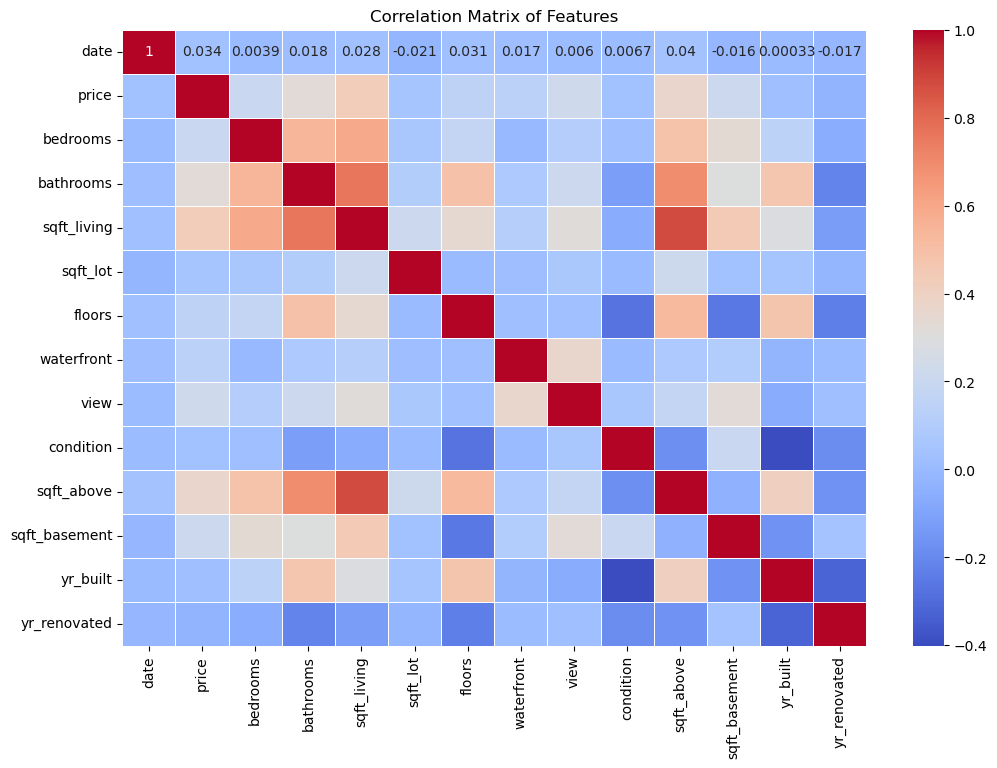

In [40]:
import numpy as np

# 1. Replace '?' with NaN
data_cleaned.replace('?', np.nan, inplace=True)

# 2. Convert relevant columns to numeric (if necessary)
# If any columns should be numeric, try converting them explicitly
for col in data_cleaned.columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# 3. Drop rows with NaN values (optional depending on your analysis needs)
data_cleaned.dropna(inplace=True)

# 4. Now calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# 5. Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
